In [2]:
import yfinance as yf

tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)

tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO 

url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

response = requests.get(url_gme)
html_data_2 = response.text

html_data_io = StringIO(html_data_2)

tables = pd.read_html(html_data_io)
gme_revenue = tables[1]  

# Limpar os dados
gme_revenue.columns = ["Date", "Revenue"] 
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|$', "", regex=True)  
gme_revenue.dropna(inplace=True) 
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]  


print(gme_revenue.tail())

          Date Revenue
57  2006-01-31   $1667
58  2005-10-31    $534
59  2005-07-31    $416
60  2005-04-30    $475
61  2005-01-31    $709


In [3]:
import yfinance as yf
import pandas as pd

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)

print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

response = requests.get(url_gme)
html_data = response.text

html_data_io = StringIO(html_data)

tables = pd.read_html(html_data_io)
gme_revenue = tables[1]

# Limpar os dados da tabela
gme_revenue.columns = ["Date", "Revenue"]  
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r'[\$,]', '', regex=True)  
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""] 

print(gme_revenue.tail())

          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


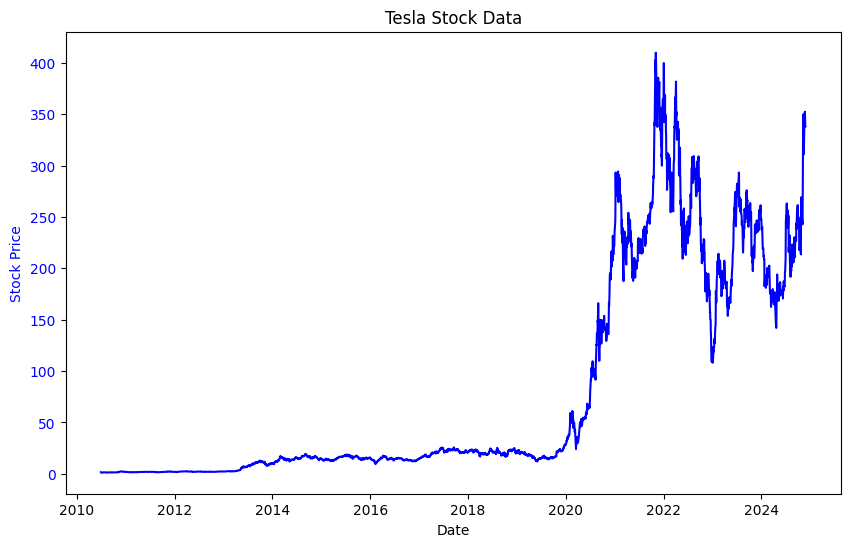

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

def make_graph(data, title):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(data['Date'], data['Close'], color='blue', label='Stock Price')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(title)

    plt.show()
    
make_graph(tesla_data, 'Tesla Stock Data')

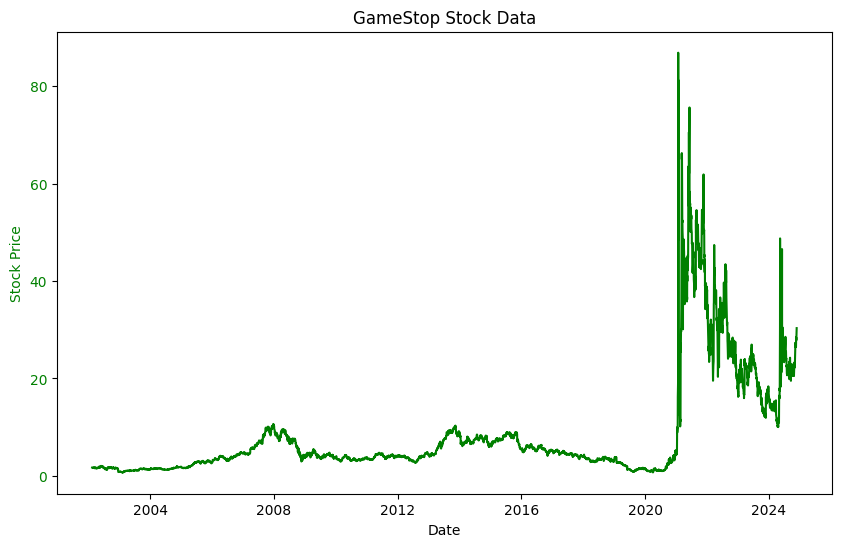

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

def make_graph(data, title):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(data['Date'], data['Close'], color='green', label='Stock Price')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color='green')
    ax1.tick_params(axis='y', labelcolor='green')
    ax1.set_title(title)

    plt.show()

make_graph(gme_data, 'GameStop Stock Data')